In [92]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader,Subset
from torchvision import transforms
from PIL import Image
from typing import Tuple

In [93]:
UnNormalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
Normalize = transforms.Normalize(mean=mean,std=std)

In [94]:
class ImageMessageDataset(Dataset):
    def __init__(self,img_dir:str,msg_length:int,transform:transforms.Compose = None) -> None:
        super().__init__()

        self.img_dir = img_dir
        self.transform = transform
        self.msg_length = msg_length
        self.imgs = []
        for f in os.listdir(img_dir):
            if os.path.isfile(os.path.join(img_dir,f)):
                self.imgs.append(f)
        
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index) -> Tuple[torch.Tensor,torch.Tensor]:
        img_path = os.path.join(self.img_dir, self.imgs[index])
        image = Image.open(img_path).convert('RGB')
        image = image.resize((256, 256), Image.BICUBIC)
        if self.transform:
            image = self.transform(image)

        message = torch.randint(0,2,(30,)).float()

        return image, message

In [95]:
def get_data_loaders(dataset:Dataset,train:int=1000,val:int=100,test:int=100,batch_size:int=8) -> Tuple[DataLoader, DataLoader, DataLoader]:
       
    total_size = len(dataset)
    train_size = train
    val_size = val
    test_size = test
    
    assert train_size + val_size + test_size <= total_size, "The total size of splits exceeds the dataset size"
    
    indices = list(range(total_size))
    split_indices = {
        'train': indices[:train_size],
        'val': indices[train_size:train_size + val_size],
        'test': indices[train_size + val_size:train_size + val_size + test_size]
    }
    
    train_dataset = Subset(dataset, split_indices['train'])
    val_dataset = Subset(dataset, split_indices['val'])
    test_dataset = Subset(dataset, split_indices['test'])
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

In [96]:
img_dir = './imgs'
msg_length = 30
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dataset = ImageMessageDataset(img_dir,msg_length,transform)
trainloader,valoader,testloader = get_data_loaders(dataset)

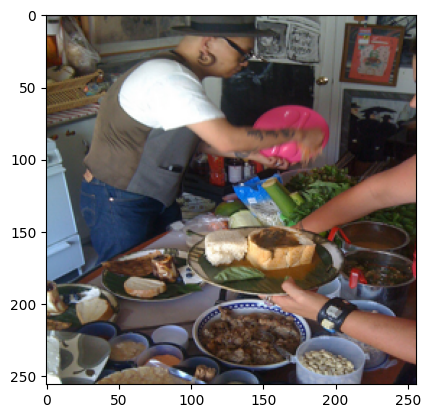

In [104]:
plt.imshow(UnNormalize(dataset[0][0]).permute(1,2,0).numpy())
plt.show()